In [118]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy.optimize import fsolve
from tbcontrol.symbolic import routh
import pandas as pd
from time import time as millis

# ANÁLISE ESTATÍSTICA

In [119]:
filesPath = '../Analysis/files/'
df = pd.read_csv(filesPath + 'test_9.csv')

df.head()

,pressure,derivative,mean,std,relative,time,blowing
0,24954.70508,2495470.5,2495.470459,7891.370605,100.000000,0.010,False
1,86846.62500,6189192.5,11180.132810,27719.070310,78.402824,0.079,False
2,169449.92190,8260330.0,28125.125000,56733.421880,63.788815,0.177,False
3,260541.71880,9109180.0,54179.300780,91534.078130,53.425606,0.275,False
4,351393.50000,9085178.0,89318.648440,128434.820300,45.471642,0.373,False


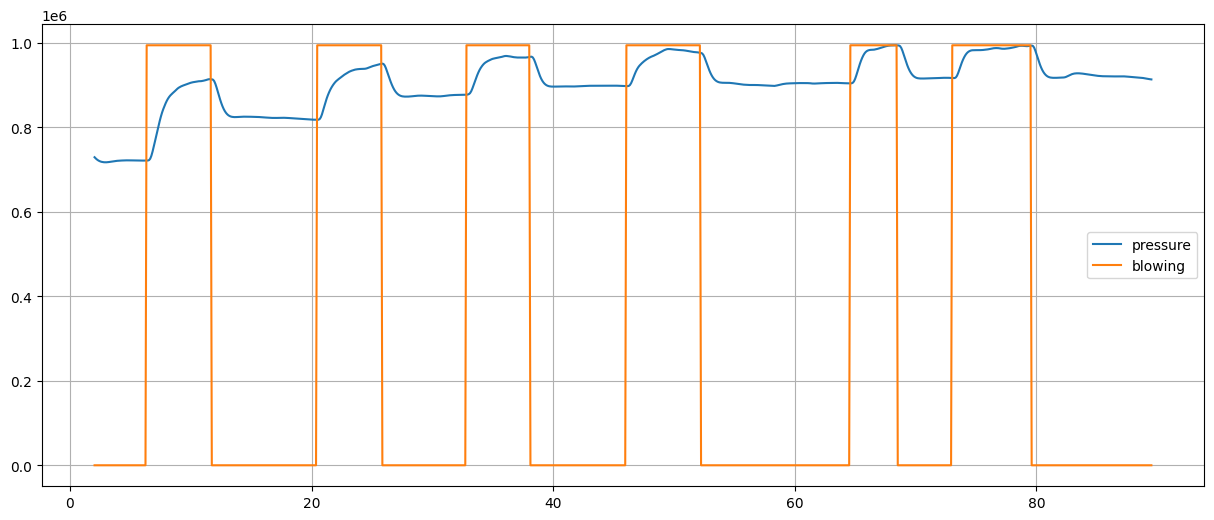

In [120]:
df = df.loc[(df.time > 2)]

plt.figure(figsize=(15, 6))
plt.plot(df.time, df.pressure, label='pressure')
plt.plot(df.time, df.blowing*max(df.pressure), label='blowing')
plt.legend()
plt.grid()

## TESTE DA DERIVADA

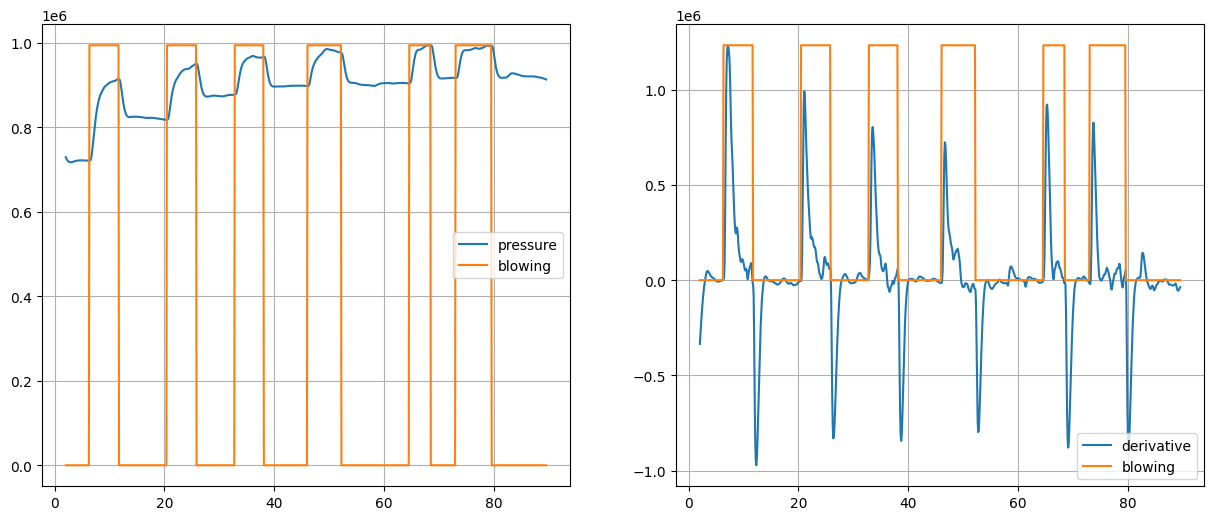

In [121]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(df.time, df.pressure, label='pressure')
plt.plot(df.time, df.blowing*max(df.pressure), label='blowing')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(df.time, df.derivative, label='derivative')
plt.plot(df.time, df.blowing*max(df.derivative), label='blowing')
plt.legend()
plt.grid()

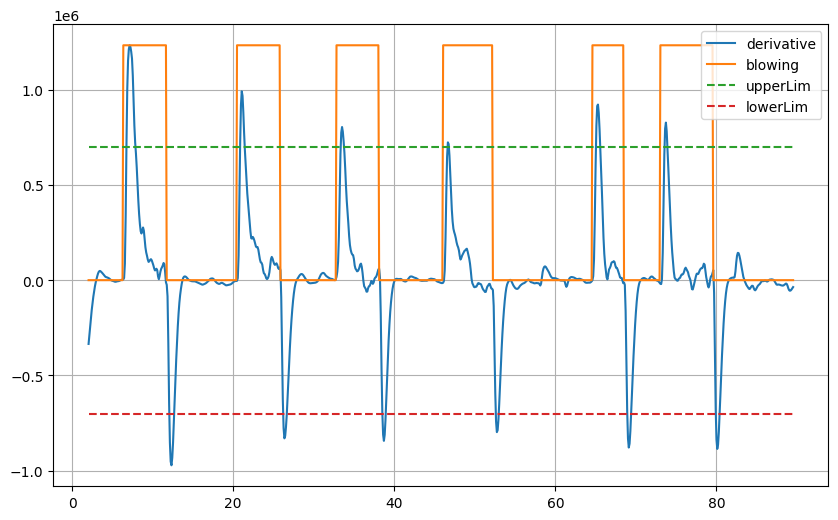

In [122]:
plt.figure(figsize=(10, 6))

plt.plot(df.time, df.derivative, label='derivative')
plt.plot(df.time, df.blowing*max(df.derivative), label='blowing')
plt.plot(df.time, [0.7e6 for i in df.time], '--', label='upperLim')
plt.plot(df.time, [-0.7e6 for i in df.time], '--', label='lowerLim')
plt.plot()
plt.legend()
plt.grid()

## TESTE DA INCERTEZA

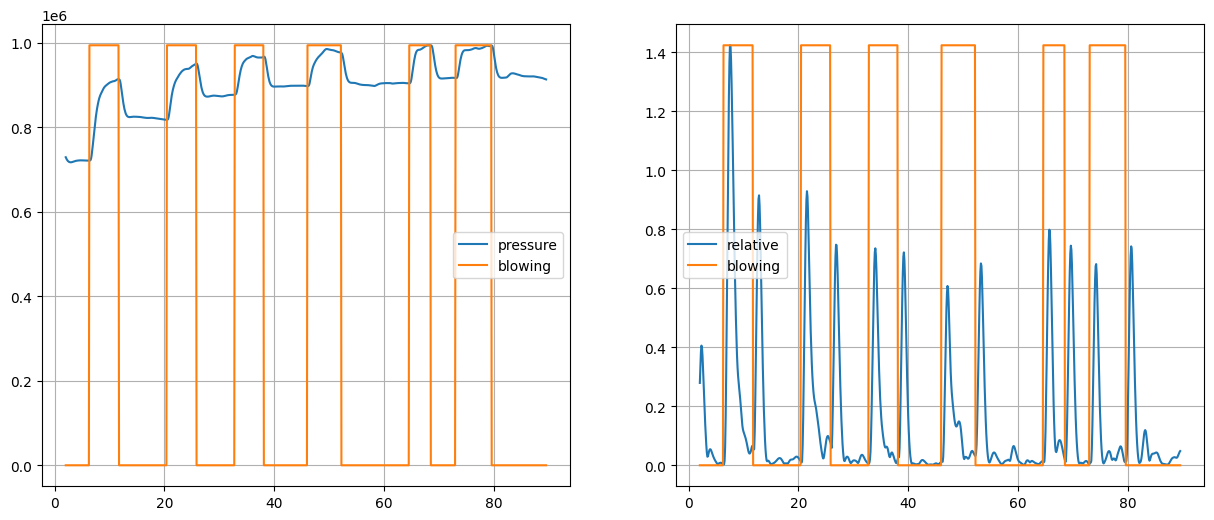

In [123]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(df.time, df.pressure, label='pressure')
plt.plot(df.time, df.blowing*max(df.pressure), label='blowing')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(df.time, df.relative, label='relative')
plt.plot(df.time, df.blowing*max(df.relative), label='blowing')
plt.legend()
plt.grid()

In [124]:
tareRel = df.relative[:10].mean()
print('tared relative: ', tareRel)

minRel = 4*tareRel
print('min treshold relative: ', minRel)

tared relative:  0.31848607510000004
min treshold relative:  1.2739443004000002


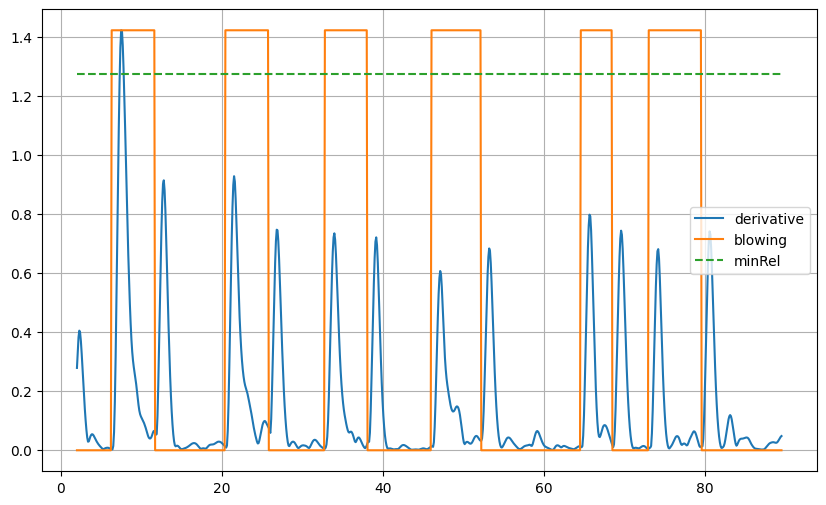

In [125]:
plt.figure(figsize=(10, 6))

plt.plot(df.time, df.relative, label='derivative')
plt.plot(df.time, df.blowing*max(df.relative), label='blowing')
plt.plot(df.time, [minRel for i in df.time], '--', label='minRel')
plt.plot()
plt.legend()
plt.grid()

# DERIVADA RELATIVA

In [126]:
tarePressure = df.loc[df.time < 4].pressure.mean()
tarePressure

719689.38125

In [127]:
df['relative'] = df.derivative / tarePressure
df

,pressure,derivative,mean,std,relative,time,blowing
21,728898.6250,-334681.25,739637.3750,6528.231934,-0.465036,2.039000,False
22,725975.7500,-292287.50,738828.7500,7692.523926,-0.406130,2.137000,False
23,723521.0000,-245475.00,736926.6250,8925.185547,-0.341085,2.235000,False
24,721536.4375,-198456.25,734423.1250,9416.845703,-0.275753,2.333000,False
25,719971.9375,-156450.00,731683.8750,9216.041992,-0.217385,2.431000,False
...,...,...,...,...,...,...,...
909,914795.6250,-55562.50,916511.3750,931.793457,-0.077203,89.123001,False
910,914257.7500,-53787.50,916166.6875,1068.788574,-0.074737,89.222000,False
911,913768.8125,-48893.75,915800.3125,1205.729370,-0.067937,89.320000,False
912,913341.4375,-42737.50,915414.8750,1320.662964,-0.059383,89.417999,False


In [128]:
tarePressure

719689.38125

In [129]:
isBlowing = False

def hasBlown(derivative, relative):
    global isBlowing

    if derivative > 0.7e6:
        isBlowing = True

    if derivative < -0.7e6:
        isBlowing = False

    return isBlowing


df['new_blow'] = df.apply(lambda row: hasBlown(row.derivative, row.relative), axis=1)
df.head()

,pressure,derivative,mean,std,relative,time,blowing,new_blow
21,728898.6250,-334681.25,739637.375,6528.231934,-0.465036,2.039,False,False
22,725975.7500,-292287.50,738828.750,7692.523926,-0.406130,2.137,False,False
23,723521.0000,-245475.00,736926.625,8925.185547,-0.341085,2.235,False,False
24,721536.4375,-198456.25,734423.125,9416.845703,-0.275753,2.333,False,False
25,719971.9375,-156450.00,731683.875,9216.041992,-0.217385,2.431,False,False


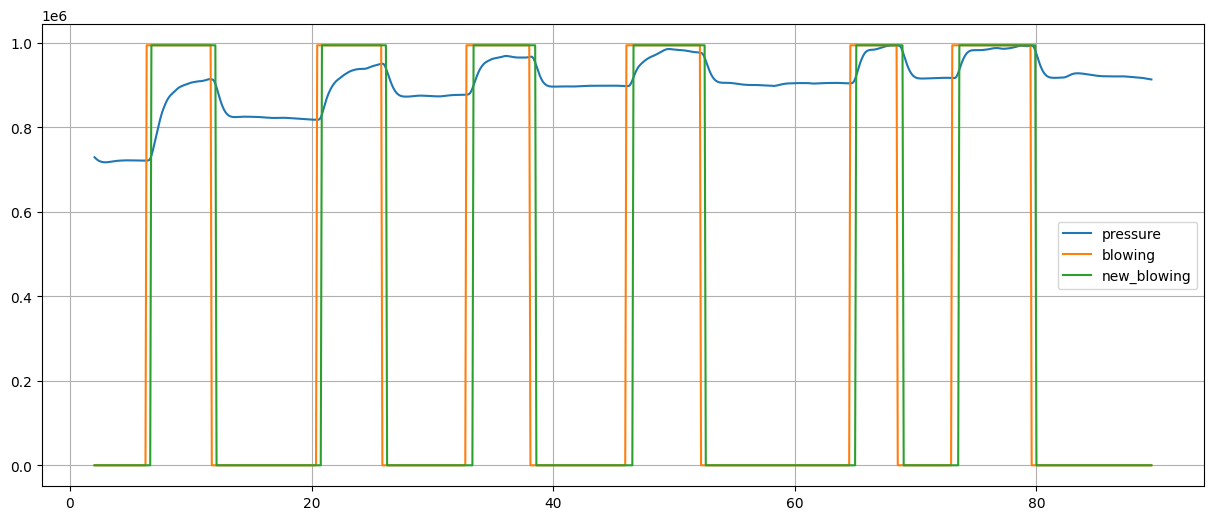

In [130]:
plt.figure(figsize=(15, 6))
plt.plot(df.time, df.pressure, label='pressure')
plt.plot(df.time, df.blowing*max(df.pressure),  label='blowing')
plt.plot(df.time, df.new_blow*max(df.pressure), label='new_blowing')
plt.legend()
plt.grid()